In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [1]:
# ! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip/

In [1]:
! pip install pycaret[full]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 320 kB 15.2 MB/s 
     |████████████████████████████████| 56 kB 5.0 MB/s 
     |████████████████████████████████| 262 kB 66.1 MB/s 
     |████████████████████████████████| 17.8 MB 59.0 MB/s 
     |████████████████████████████████| 1.7 MB 59.6 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 1.3 MB 53.9 MB/s 
     |████████████████████████████████| 6.8 MB 80.1 MB/s 
     |████████████████████████████████| 120 kB 96.8 MB/s 
     |████████████████████████████████| 167 kB 75.9 MB/s 
     |████████████████████████████████| 88 kB 7.8 MB/s 
     |████████████████████████████████| 2.0 MB 21.9 MB/s 
     |████████████████████████████████| 564 kB 85.1 MB/s 
     |████████████████████████████████|

In [1]:
# This has to be installed everytime you want to start a notebook on colabs
!pip install Jinja2==3.1.2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 133 kB 14.1 MB/s 
  Attempting uninstall: Jinja2
    Found existing installation: Jinja2 2.11.3
    Uninstalling Jinja2-2.11.3:
      Successfully uninstalled Jinja2-2.11.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires ipykernel~=4.10, but you have ipykernel 6.13.1 which is incompatible.
google-colab 1.0.0 requires ipython~=5.5.0, but you have ipython 7.34.0 which is incompatible.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.28.0 which is incompatible.
google-colab 1.0.0 requires tornado~=5.1.0; python_version >= "3.0", but you have tornado 6.1 which is incompatible.
flask 1.1.4 requires Jinja2<3.0,>=2.10.1, but you have jinja2 3.1.2 which is incompatible.
datascience 0.

In [1]:
! gdown -- 1-leBDJFy2np2SwZSDfTDDbQ5PuHVN85a 
! gdown -- 1ffMRExVQUyyOxNNIqJBXkAVABlCR8ksU
! gdown -- 1-jnAaCOyzday6lTDSZmfiOiIcBJYvGBj 

Downloading...
From: https://drive.google.com/uc?id=1-leBDJFy2np2SwZSDfTDDbQ5PuHVN85a
To: /content/Train.csv
100% 11.0M/11.0M [00:00<00:00, 156MB/s]
Downloading...
From: https://drive.google.com/uc?id=1ffMRExVQUyyOxNNIqJBXkAVABlCR8ksU
To: /content/Test.csv
100% 886k/886k [00:00<00:00, 162MB/s]
Downloading...
From: https://drive.google.com/uc?id=1-jnAaCOyzday6lTDSZmfiOiIcBJYvGBj
To: /content/SampleSubmission.csv
100% 164k/164k [00:00<00:00, 91.7MB/s]


In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
import warnings
warnings.filterwarnings("ignore")

In [3]:
#Loading Dataset
train = pd.read_csv('Train.csv')
test = pd.read_csv('Test.csv')
sample= pd.read_csv('SampleSubmission.csv')

In [4]:
# check data shapes
train.shape, test.shape

((107833, 10), (9333, 9))

In [5]:
# Preview train
train.head()

,ID,DATOP,FLTID,DEPSTN,ARRSTN,STD,STA,STATUS,AC,target
0,train_id_0,2016-01-03,TU 0712,CMN,TUN,2016-01-03 10:30:00,2016-01-03 12.55.00,ATA,TU 32AIMN,260.0
1,train_id_1,2016-01-13,TU 0757,MXP,TUN,2016-01-13 15:05:00,2016-01-13 16.55.00,ATA,TU 31BIMO,20.0
2,train_id_2,2016-01-16,TU 0214,TUN,IST,2016-01-16 04:10:00,2016-01-16 06.45.00,ATA,TU 32AIMN,0.0
3,train_id_3,2016-01-17,TU 0480,DJE,NTE,2016-01-17 14:10:00,2016-01-17 17.00.00,ATA,TU 736IOK,0.0
4,train_id_4,2016-01-17,TU 0338,TUN,ALG,2016-01-17 14:30:00,2016-01-17 15.50.00,ATA,TU 320IMU,22.0


In [6]:
# Preview riders
test.head()

,ID,DATOP,FLTID,DEPSTN,ARRSTN,STD,STA,STATUS,AC
0,test_id_0,2016-05-04,TU 0700,DJE,TUN,2016-05-04 06:40:00,2016-05-04 07.30.00,ATA,TU 32AIMF
1,test_id_1,2016-05-05,TU 0395,TUN,BKO,2016-05-05 15:20:00,2016-05-05 20.05.00,ATA,TU 320IMW
2,test_id_2,2016-05-06,TU 0745,FRA,TUN,2016-05-06 10:00:00,2016-05-06 12.25.00,ATA,TU 32AIMC
3,test_id_3,2016-05-11,TU 0848,BEY,TUN,2016-05-11 09:40:00,2016-05-11 13.10.00,ATA,TU 31BIMO
4,test_id_4,2016-05-11,TU 0635,ORY,MIR,2016-05-11 09:50:00,2016-05-11 12.35.00,ATA,TU 736IOQ


In [4]:
train.drop('ID', 1, inplace = True)
test.drop('ID', 1, inplace = True)
print(train.columns)

Index(['DATOP', 'FLTID', 'DEPSTN', 'ARRSTN', 'STD', 'STA', 'STATUS', 'AC',
       'target'],
      dtype='object')


In [9]:
# # report generation for EDA
import pandas_profiling as pp
pp.ProfileReport(train)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107833 entries, 0 to 107832
Data columns (total 9 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   DATOP   107833 non-null  object 
 1   FLTID   107833 non-null  object 
 2   DEPSTN  107833 non-null  object 
 3   ARRSTN  107833 non-null  object 
 4   STD     107833 non-null  object 
 5   STA     107833 non-null  object 
 6   STATUS  107833 non-null  object 
 7   AC      107833 non-null  object 
 8   target  107833 non-null  float64
dtypes: float64(1), object(8)
memory usage: 7.4+ MB


## Feature Engineering

**Column: DATOP**

In [5]:
#engineer year,month and day variables from DATOP variable

train['year'] = train['DATOP'].str.split('-').str[0]
train['month'] = train['DATOP'].str.split('-').str[1]
train['day'] = train['DATOP'].str.split('-').str[2]

test['year'] = test['DATOP'].str.split('-').str[0]
test['month'] = test['DATOP'].str.split('-').str[1]
test['day'] = test['DATOP'].str.split('-').str[2]



**Column: FLTID**

In [6]:
#engineer new feature from FLTID column

train['flight_id'] = train['FLTID'].str.split(' ').str[0]
test['flight_id'] = test['FLTID'].str.split(' ').str[0]
#number of unique values 
len(train['flight_id'].value_counts())

19

**Column: DEPSTN**

In [7]:
#copy DEPSTN column as it is 
train['departure_point'] = train['DEPSTN']
#list of labels to keep in departure_point column
labels_to_keep = ['TUN','DJE','ORY','MIR']
#replace values using list comprehension
train['departure_point_new'] = train['departure_point'
                                                          ].replace(to_replace = [label for label in train['departure_point'].values if label not in labels_to_keep], 
                                                   value = 'OTHER')
#drop departure point column
train.drop(labels = ['departure_point'], axis = 1, inplace=True)


#copy DEPSTN column as it is 
test['departure_point'] = test['DEPSTN']
#list of labels to keep in departure_point column
labels_to_keep = ['TUN','DJE','ORY','MIR']
#replace values using list comprehension
test['departure_point_new'] = test['departure_point'
                                                          ].replace(to_replace = [label for label in test['departure_point'].values if label not in labels_to_keep], 
                                                   value = 'OTHER')
#drop departure point column
test.drop(labels = ['departure_point'], axis = 1, inplace=True)

**Column: ARRSTN**

In [8]:
#copy ARRSTN column as it is 
train['arrival_point'] = train['ARRSTN']
#list of labels to keep in departure_point column
labels_to_keep = ['TUN','DJE','ORY','MIR']
#replace values using list comprehension
train['arrival_point_new'] = train['arrival_point'
                                          ].replace(to_replace = [label for label in train['arrival_point'].values if label not in labels_to_keep], 
                                                   value = 'OTHER')

#drop arrival point column
train.drop(labels = ['arrival_point'], axis = 1, inplace=True)

#copy ARRSTN column as it is 
test['arrival_point'] = test['ARRSTN']
#list of labels to keep in departure_point column
labels_to_keep = ['TUN','DJE','ORY','MIR']
#replace values using list comprehension
test['arrival_point_new'] = test['arrival_point'
                                          ].replace(to_replace = [label for label in test['arrival_point'].values if label not in labels_to_keep], 
                                                   value = 'OTHER')

#drop arrival point column
test.drop(labels = ['arrival_point'], axis = 1, inplace=True)


**Column: STD**

In [9]:
#engineer departure hour and minute from STD column Train

train['departure_hour'] = train['STD'].str.split(' ').str[1]
train['departure_hour'] = train['departure_hour'].str.split(':').str[0]

train['departure_minute'] = train['STD'].str.split(' ').str[1]
train['departure_minute'] =train['departure_minute'].str.split(':').str[1]

#engineer departure hour and minute from STD column Test

test['departure_hour'] = test['STD'].str.split(' ').str[1]
test['departure_hour'] = test['departure_hour'].str.split(':').str[0]

test['departure_minute'] = test['STD'].str.split(' ').str[1]
test['departure_minute'] = test['departure_minute'].str.split(':').str[1]

**Column: STA**

In [10]:
#engineer arrival_hour and arrival_minute variables

train['arrival_hour'] = train['STA'].str.split(' ').str[1]
train['arrival_hour'] = train['arrival_hour'].str.split('.').str[0]

train['arrival_minute'] = train['STA'].str.split(' ').str[1]
train['arrival_minute'] = train['arrival_minute'].str.split('.').str[1]

test['arrival_hour'] = test['STA'].str.split(' ').str[1]
test['arrival_hour'] = test['arrival_hour'].str.split('.').str[0]

test['arrival_minute'] = test['STA'].str.split(' ').str[1]
test['arrival_minute'] = test['arrival_minute'].str.split('.').str[1]

**Column: STATUS**

In [11]:
#check number of unique values in status column
train['flight_status'] = train['STATUS']
test['flight_status'] = test['STATUS']
len(train['STATUS'].value_counts())

5

**Column: AC**

In [12]:
#engineer new feature from first two letters of AC column
train['aircraft_code'] = train['AC'].str.split(' ').str[0]
test['aircraft_code'] = test['AC'].str.split(' ').str[0]

In [13]:
#remove outliers using zscores
from scipy import stats
import numpy as np

train['target'] = train['target']

#get zscores of target variable
z_scores = stats.zscore(train['target'])
#get absolute values of target variable
abs_z_scores = np.abs(z_scores)
#filter dataframe
filtered_enteries = (abs_z_scores < 3)
train = train[filtered_enteries]

In [14]:
#Typecasting
train['year'] = train['year'].astype(int)
train['month'] = train['month'].astype(int)
train['day'] = train['day'].astype(int)
train['departure_hour'] = train['departure_hour'].astype(int)
train['departure_minute'] = train['departure_minute'].astype(int)
train['arrival_hour'] = train['arrival_hour'].astype(int)
train['arrival_minute'] = train['arrival_minute'].astype(int)


#Typecasting
test['year'] = test['year'].astype(int)
test['month'] = test['month'].astype(int)
test['day'] = test['day'].astype(int)
test['departure_hour'] = test['departure_hour'].astype(int)
test['departure_minute'] = test['departure_minute'].astype(int)
test['arrival_hour'] = test['arrival_hour'].astype(int)
test['arrival_minute'] = test['arrival_minute'].astype(int)


In [32]:
test.columns

Index(['DATOP', 'FLTID', 'DEPSTN', 'ARRSTN', 'STD', 'STA', 'STATUS', 'AC',
       'year', 'month', 'day', 'flight_id', 'departure_point_new',
       'arrival_point_new', 'departure_hour', 'departure_minute',
       'arrival_hour', 'arrival_minute', 'flight_status', 'aircraft_code'],
      dtype='object')

In [15]:
train.drop(['DATOP', 'FLTID', 'DEPSTN', 'ARRSTN', 'STD', 'STA', 'STATUS', 'AC'], 1, inplace = True)
test.drop(['DATOP', 'FLTID', 'DEPSTN', 'ARRSTN', 'STD', 'STA', 'STATUS', 'AC'], 1, inplace = True)

In [34]:
train.head()

,target,year,month,day,flight_id,departure_point_new,arrival_point_new,departure_hour,departure_minute,arrival_hour,arrival_minute,flight_status,aircraft_code
0,260,2016,1,3,TU,OTHER,TUN,10,30,12,55,ATA,TU
1,20,2016,1,13,TU,OTHER,TUN,15,5,16,55,ATA,TU
2,0,2016,1,16,TU,TUN,OTHER,4,10,6,45,ATA,TU
3,0,2016,1,17,TU,DJE,OTHER,14,10,17,0,ATA,TU
4,22,2016,1,17,TU,TUN,OTHER,14,30,15,50,ATA,TU


In [35]:
test.head()

,year,month,day,flight_id,departure_point_new,arrival_point_new,departure_hour,departure_minute,arrival_hour,arrival_minute,flight_status,aircraft_code
0,2016,5,4,TU,DJE,TUN,6,40,7,30,ATA,TU
1,2016,5,5,TU,TUN,OTHER,15,20,20,5,ATA,TU
2,2016,5,6,TU,OTHER,TUN,10,0,12,25,ATA,TU
3,2016,5,11,TU,OTHER,TUN,9,40,13,10,ATA,TU
4,2016,5,11,TU,ORY,MIR,9,50,12,35,ATA,TU


In [47]:
cat_features = {
'flight_status',
'aircraft_code'}

for cat_feature in cat_features:
  print(cat_feature, train[cat_feature].unique(), sep=":")
  print("#"*50)

flight_status:['ATA' 'DEP' 'RTR' 'SCH' 'DEL']
##################################################
aircraft_code:['TU' '5M' 'UG' '5K' 'BJ' 'GJ' 'QS' 'PS' 'D4' 'UJ' 'GW' '6P' 'OL' 'X9']
##################################################


In [36]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107833 entries, 0 to 107832
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   target               107833 non-null  int64 
 1   year                 107833 non-null  int64 
 2   month                107833 non-null  int64 
 3   day                  107833 non-null  int64 
 4   flight_id            107833 non-null  object
 5   departure_point_new  107833 non-null  object
 6   arrival_point_new    107833 non-null  object
 7   departure_hour       107833 non-null  int64 
 8   departure_minute     107833 non-null  int64 
 9   arrival_hour         107833 non-null  int64 
 10  arrival_minute       107833 non-null  int64 
 11  flight_status        107833 non-null  object
 12  aircraft_code        107833 non-null  object
dtypes: int64(8), object(5)
memory usage: 10.7+ MB


In [37]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9333 entries, 0 to 9332
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   year                 9333 non-null   int64 
 1   month                9333 non-null   int64 
 2   day                  9333 non-null   int64 
 3   flight_id            9333 non-null   object
 4   departure_point_new  9333 non-null   object
 5   arrival_point_new    9333 non-null   object
 6   departure_hour       9333 non-null   int64 
 7   departure_minute     9333 non-null   int64 
 8   arrival_hour         9333 non-null   int64 
 9   arrival_minute       9333 non-null   int64 
 10  flight_status        9333 non-null   object
 11  aircraft_code        9333 non-null   object
dtypes: int64(7), object(5)
memory usage: 875.1+ KB


## Modelling

In [16]:
from pycaret.regression import *
from pycaret.utils import enable_colab
enable_colab()

Colab mode enabled.


In [21]:
exp_reg101 = setup(data = train, 
                  target = 'target',
                  # transformation = True, 
                  # transform_target = True,
                  # remove_multicollinearity = True, 
                  # multicollinearity_threshold = 0.6,
                  silent = True,
                  session_id=2022,
                  normalize=True,
                  normalize_method="robust"
                )

,Description,Value
0,session_id,2022
1,Target,target
2,Original Data,"(105894, 13)"
3,Missing Values,False
4,Numeric Features,5
5,Categorical Features,7
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(74125, 68)"


In [22]:
models = compare_models(n_select = 3,fold =5,sort="MAPE")

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
huber,Huber Regressor,3.256970e+01,4.102636e+03,6.404730e+01,-5.400000e-03,1.7834,8.123000e-01,1.300
par,Passive Aggressive Regressor,3.423350e+01,4.296258e+03,6.553590e+01,-5.320000e-02,1.8792,8.609000e-01,0.132
lightgbm,Light Gradient Boosting Machine,3.428450e+01,3.247265e+03,5.698130e+01,2.042000e-01,1.8798,1.400000e+00,0.304
dummy,Dummy Regressor,4.165010e+01,4.080503e+03,6.387510e+01,-1.000000e-04,2.3506,1.404400e+00,0.036
llar,Lasso Least Angle Regression,4.165010e+01,4.080503e+03,6.387510e+01,-1.000000e-04,2.3506,1.404400e+00,0.046
catboost,CatBoost Regressor,3.435410e+01,3.196806e+03,5.653750e+01,2.165000e-01,1.9002,1.405500e+00,6.886
xgboost,Extreme Gradient Boosting,3.444550e+01,3.219376e+03,5.673680e+01,2.110000e-01,1.8959,1.409400e+00,4.684
en,Elastic Net,3.973200e+01,3.857301e+03,6.210330e+01,5.470000e-02,2.2531,1.472600e+00,0.048
gbr,Gradient Boosting Regressor,3.617890e+01,3.461362e+03,5.882990e+01,1.517000e-01,1.9840,1.480200e+00,3.096
knn,K Neighbors Regressor,3.602760e+01,3.785534e+03,6.152460e+01,7.210000e-02,1.7642,1.495800e+00,5.482


In [ ]:
# model = [tune_model(i,fold =10, round =2, optimize = 'Accuracy' ) for i in models]

In [24]:
m1 = create_model('huber', cross_validation = True,round=3)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,32.279,4005.138,63.286,0.001,1.803,0.825
1,32.733,4135.454,64.307,-0.006,1.777,0.815
2,33.466,4306.612,65.625,-0.017,1.786,0.794
3,31.824,3978.577,63.076,-0.001,1.782,0.797
4,32.798,4205.612,64.851,-0.008,1.785,0.821
5,33.216,4333.832,65.832,-0.008,1.781,0.786
6,32.466,4069.658,63.794,-0.003,1.761,0.831
7,32.386,3982.830,63.110,-0.005,1.773,0.809
8,32.309,4051.257,63.649,-0.006,1.789,0.829


In [25]:
m2= create_model('par', cross_validation = True,round=3)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,32.970,4040.816,63.567,-0.008,1.851,0.857
1,34.147,3980.190,63.089,0.032,1.895,1.021
2,35.383,4632.223,68.060,-0.094,1.897,0.811
3,33.050,4068.853,63.788,-0.024,1.874,0.837
4,33.755,4351.313,65.964,-0.042,1.850,0.806
5,35.514,4956.249,70.401,-0.153,1.877,0.770
6,33.572,4090.603,63.958,-0.008,1.839,0.908
7,33.914,4455.938,66.753,-0.125,1.851,0.764
8,33.452,4409.575,66.405,-0.095,1.828,0.761


In [26]:
m3= create_model('lightgbm', cross_validation = True,round=3)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,34.239,3166.423,56.271,0.210,1.915,1.425
1,34.301,3222.972,56.771,0.216,1.870,1.402
2,34.642,3341.796,57.808,0.211,1.869,1.349
3,33.855,3205.229,56.615,0.194,1.876,1.389
4,34.200,3300.921,57.454,0.209,1.877,1.395
5,34.658,3394.579,58.263,0.210,1.877,1.368
6,34.264,3248.135,56.992,0.199,1.865,1.443
7,33.919,3137.530,56.014,0.208,1.867,1.374
8,34.396,3232.770,56.857,0.197,1.898,1.452


# Ensemble method

In [ ]:
# ensemble model
boosted_1 = ensemble_model(m1, method = 'Boosting')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,4.4674,179.3008,13.3903,0.8455,0.3481,0.2989
1,3.9921,150.1495,12.2535,0.6384,0.3220,0.3002
2,4.0912,132.9982,11.5325,0.5499,0.3790,0.2992
3,4.6861,250.4132,15.8244,0.5934,0.3695,0.3012
4,5.0701,350.2818,18.7158,0.5075,0.3589,0.3134
5,4.8654,439.9890,20.9759,0.6488,0.3461,0.2969
6,4.1203,232.6100,15.2516,0.5730,0.3299,0.2890
7,4.8720,271.0556,16.4638,0.5427,0.3853,0.2990
8,3.5941,110.5491,10.5142,0.6130,0.3356,0.3105


In [ ]:
# ensemble model
boosted_2= ensemble_model(m2, method = 'Boosting')

In [ ]:
# ensemble model
boosted_3 = ensemble_model(m3, method = 'Boosting')

In [ ]:
tuned_model_1 = tune_model(boosted_1,optimize="RMSE")

# Blending method

In [27]:
# blend models
blender = blend_models([m1, m2, m3], fold =15,weights=[0.5,0.2,0.3])

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,32.9313,3723.1105,61.0173,0.1157,1.8651,1.0075
1,31.9428,3308.5570,57.5201,0.1290,1.8704,1.1141
2,32.9879,3651.2457,60.4255,0.1247,1.8304,1.0576
3,33.9572,3616.9183,60.1408,0.1295,1.9159,1.1405
4,34.0852,3629.9669,60.2492,0.1299,1.9053,1.1712
5,32.0171,3525.9354,59.3796,0.1163,1.8471,1.0177
6,32.7557,3603.2767,60.0273,0.1204,1.8675,1.0588
7,32.9205,3770.3040,61.4028,0.1161,1.8365,1.0610
8,32.4589,3948.7827,62.8393,0.0920,1.7689,0.8881


In [29]:
# tuned_model_2 = tune_model(blender,optimize="RMSE",search_library = 'optuna')

In [ ]:
# interpret_model(tuned_model)

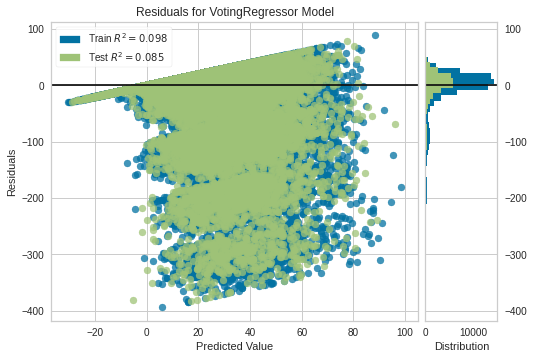

In [30]:
plot_model(blender , plot = 'residuals')

In [31]:
predictions = predict_model(blender)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Voting Regressor,31.8988,3808.2392,61.7109,0.0848,1.7557,0.9034


In [32]:
final_tuned_model=finalize_model(blender)

In [33]:
 predict_model(blender)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Voting Regressor,31.8988,3808.2392,61.7109,0.0848,1.7557,0.9034


,day,departure_hour,departure_minute,arrival_hour,arrival_minute,year_2016,year_2017,year_2018,month_1,month_10,...,aircraft_code_GW,aircraft_code_OL,aircraft_code_PS,aircraft_code_QS,aircraft_code_TU,aircraft_code_UG,aircraft_code_UJ,aircraft_code_X9,target,Label
0,0.0000,0.000,0.000000,0.125,0.666667,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,138.0,38.783711
1,0.6875,-1.000,0.166667,-0.750,-0.833333,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,250.0,35.996961
2,0.1250,1.125,-0.833333,-1.625,-0.833333,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-22.362216
3,0.5625,-0.750,-0.833333,-0.625,-0.833333,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,5.0,-0.517283
4,-0.1875,0.750,-0.500000,0.750,-0.166667,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.441866
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31764,0.7500,-0.625,-0.500000,-0.500,0.333333,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,55.0,1.352119
31765,-0.2500,1.375,1.000000,-1.250,-0.333333,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,55.0,37.856600
31766,0.8125,0.250,-0.833333,0.375,-0.166667,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,36.0,40.691068
31767,-0.1250,0.875,-0.833333,0.875,-0.833333,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-11.373890


In [ ]:
# predictions = predict_model(final_tuned_model, data=test)
# predictions.head(10)

In [ ]:
# sample1['target'] =predictions['Label']

In [ ]:
# sample1.to_csv('submission3.csv',index=False)
# sample1.head(20)

## Deployment

In [34]:
# create api
create_api(final_tuned_model, 'main')


API sucessfully created. This function only creates a POST API, it doesn't run it automatically.

To run your API, please run this command --> !python main.py
    


In [37]:
# run api
!python main.py

/usr/local/lib/python3.7/dist-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)
Transformation Pipeline and Model Successfully Loaded
INFO:     Started server process [2849]
INFO:     Waiting for application startup.
INFO:     Application startup complete.
INFO:     Uvicorn running on http://127.0.0.1:8000 (Press CTRL+C to quit)
INFO:     Shutting down
INFO:     Finished server process [2849]
ERROR:    Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/starlette/routing.py", line 638, in lifespan
    await receive()
  File "/usr/local/lib/python3.7/dist-packages/uvicorn/lifespan/on.py", line 135, in receive
    return await self.receive_queue.get()
  File "/usr/lib/python3.7/asyncio/queues.py", line 159, in get
    await getter
concurrent.futures._base.CancelledError



In [60]:
# create docker
create_docker('main')

Writing requirements.txt
Writing Dockerfile
Dockerfile and requirements.txt successfully created.
    To build image you have to run --> !docker image build -f "Dockerfile" -t IMAGE_NAME:IMAGE_TAG .
            
